# Bike Sharing Demand Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Importing the datase


In [2]:
dataset = pd.read_csv('bike.csv')

dataset=dataset.rename(columns={'Temperature':'Temperature','Humidity(%)':'Humidity','Rainfall':'Rainfall','Snowfall':'Snowfall','Wind speed':'Wind speed','Visibility':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature':'Dew point temperature'})
dataset=dataset.astype({'Rented Bike Count':'float','Hour':'object' ,'Seasons':'object', 'Holiday':'object','Functioning Day':'object'})
dataset.columns



Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(?C)', 'Humidity',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Radiation', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

# Convert the 'Date' column to datetime objects

In [3]:
import pandas as pd
# Assuming the date strings are in the format 'dd/mm/yyyy'
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')

# Extract the year, month, and day into separate columns
dataset['Year'] = dataset['Date'].dt.year.astype('category')
dataset['Month'] = dataset['Date'].dt.month.astype('category')
dataset['Day'] = dataset['Date'].dt.day.astype('category')

dataset.drop(['Date','Visibility (10m)'] ,axis=1 , inplace=True)


dataset

,Rented Bike Count,Hour,Temperature(?C),Humidity,Wind speed (m/s),Dew point temperature,Radiation,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254.0,0,-5.2,37,2.2,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,204.0,1,-5.5,38,0.8,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,173.0,2,-6.0,39,1.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,107.0,3,-6.2,40,0.9,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,78.0,4,-6.0,36,2.3,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,764.0,20,3.4,37,2.3,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,694.0,21,2.6,39,0.3,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,712.0,22,2.1,41,1.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


# One hot encoding with get_dummies


In [4]:
dataset=pd.get_dummies(dataset,columns=['Holiday','Functioning Day' ,'Seasons' ],drop_first=True)



# The distribution of the continuous variables with **histogram**

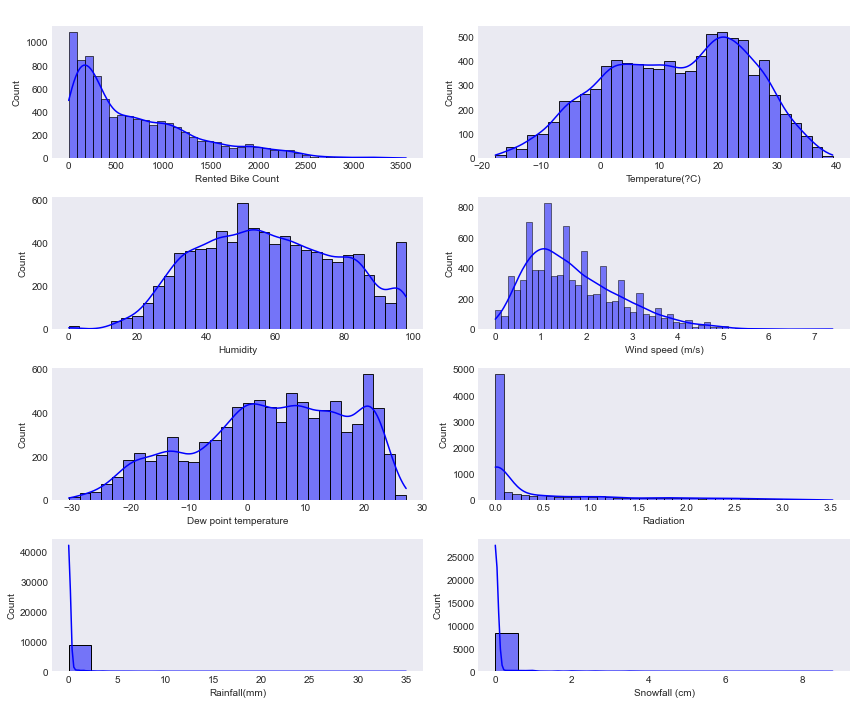

In [5]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax, color='blue', kde=True)
plt.suptitle('The distribution of the continuous variables', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()


# The distribution of the continuous variables with **boxplot**

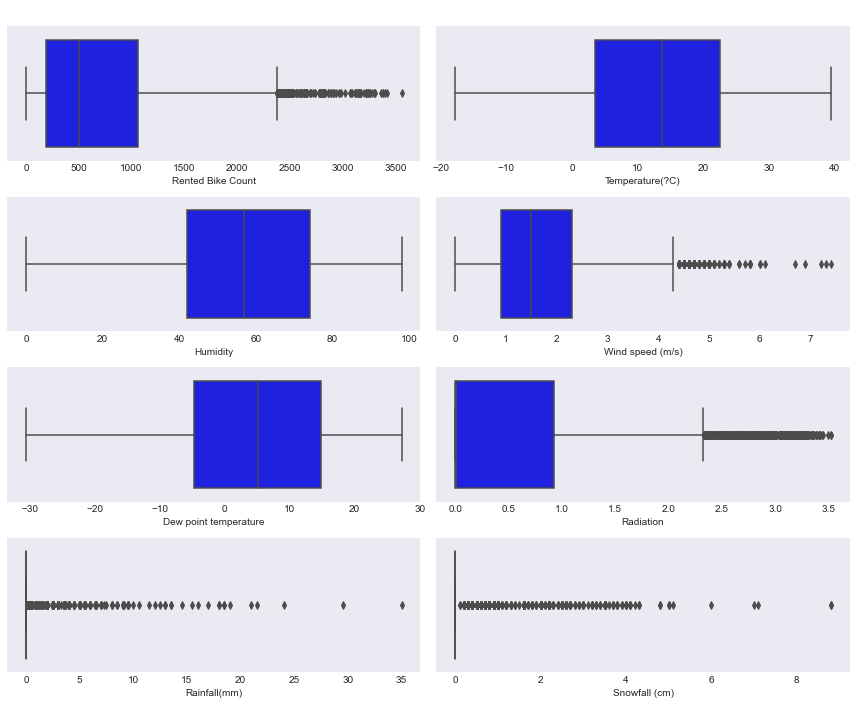

In [6]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.boxplot(data=dataset, x=col, ax=ax, color='blue')
plt.suptitle('The distribution of the continuous variables', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()


# Power Transformation
### Power transformation : is a data preprocessing technique used to transform non-normal or skewed data into a more normal distribution by applying mathematical functions. The most commonly used power transformations are the Box-Cox transformation and the Yeo-Johnson transformation.

In [7]:
#selecting variables that have data types float and int.
var=list(dataset.select_dtypes(include=['float64','int64']).columns)


In [8]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
dataset[var]=sc_X.fit_transform(dataset[var])



# Data distribution after applying Power Transformer ¶

# The distribution of the continuous variables with **histogram**

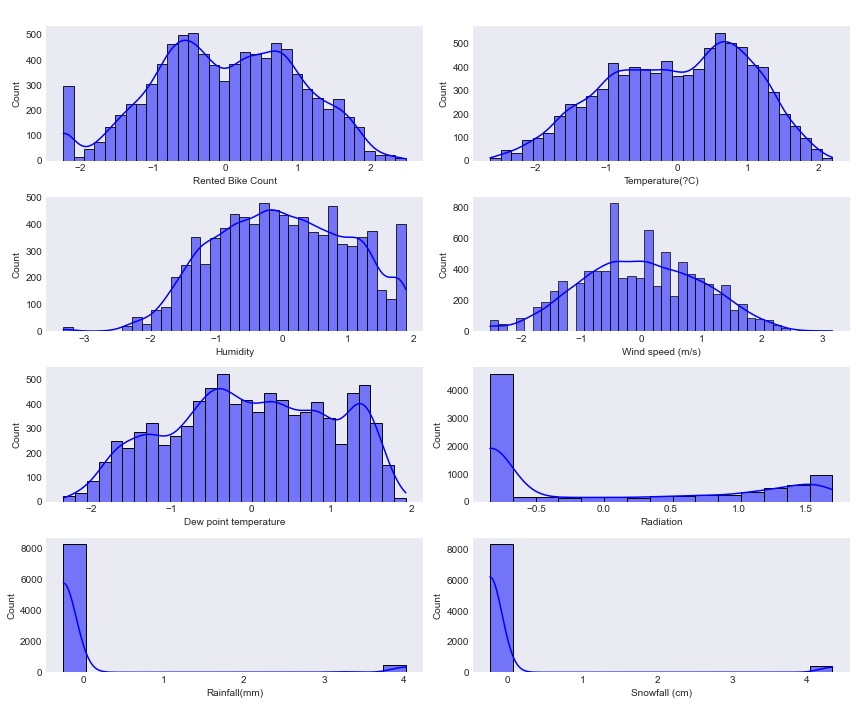

In [9]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax, color='blue', kde=True)
plt.suptitle('The distribution of the continuous variables', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()


# The distribution of the continuous variables with **boxplot**

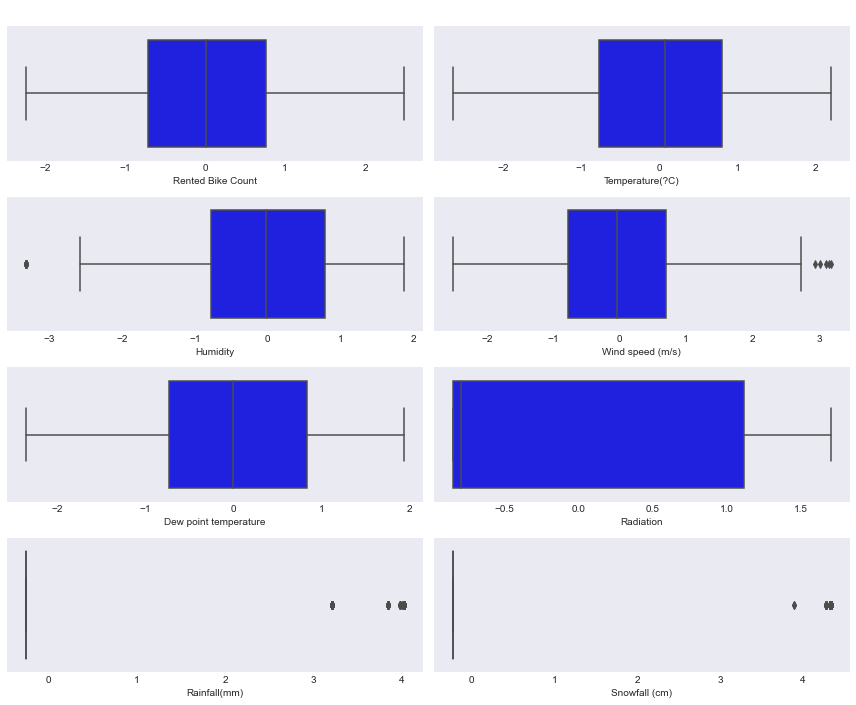

In [10]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.boxplot(data=dataset, x=col, ax=ax, color='blue')
plt.suptitle('The distribution of the continuous variables', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()


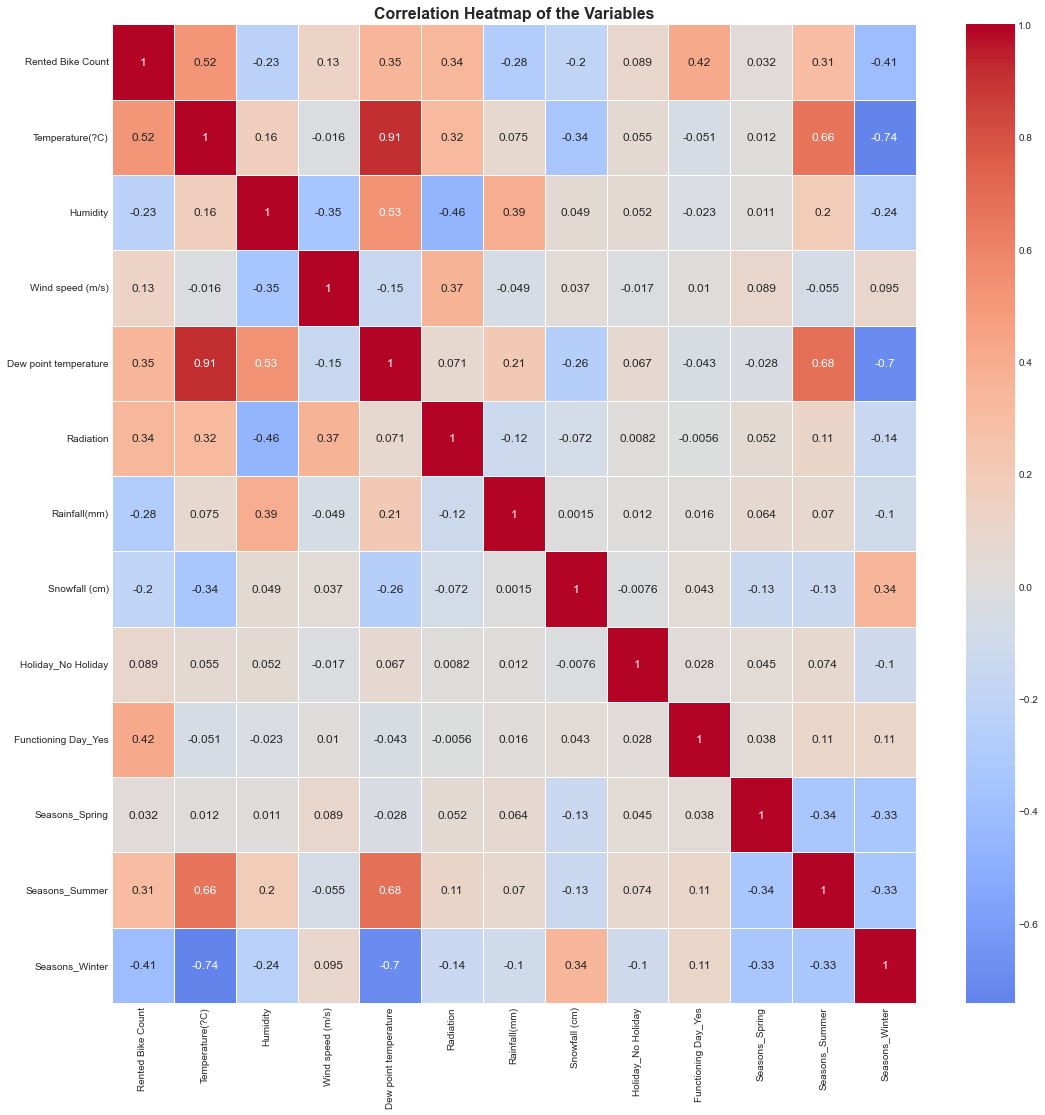

In [11]:
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(),annot=True, center=0, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 12})
plt.title('Correlation Heatmap of the Variables', fontsize=16, fontweight='bold')
plt.show()


# Split dataset in features and target variable

In [12]:
X=dataset.drop('Rented Bike Count', axis=1)
y=dataset['Rented Bike Count']

# variance inflation factor(VIF) detects multicollinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [14]:
vif(X.select_dtypes(include=['float','int']))

,Variable,VIF
0,Temperature(?C),44.621956
1,Humidity,10.028939
2,Wind speed (m/s),1.230360
3,Dew point temperature,57.816622
4,Radiation,1.780971
5,Rainfall(mm),1.193205
6,Snowfall (cm),1.166727


## Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.


In [15]:
del X['Dew point temperature']
#del X['Functioning Day']

#del X['Snowfall (cm)']


# After Droping DPT

In [16]:
vif(X.select_dtypes(include=['float','int']))

,Variable,VIF
0,Temperature(?C),1.489418
1,Humidity,1.799509
2,Wind speed (m/s),1.229908
3,Radiation,1.724920
4,Rainfall(mm),1.192440
5,Snowfall (cm),1.162206


# Feature_selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation


In [18]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
feature_contribution=(fs.scores_/sum(fs.scores_))*100


# Feature importance Graph 


Hour: 11.13%
Temperature(?C): 25.62%
Humidity: 3.73%
Wind speed (m/s): 1.23%
Radiation: 9.05%
Rainfall(mm): 5.98%
Snowfall (cm): 2.81%
Year: 2.78%
Month: 1.06%
Day: 0.15%
Holiday_No Holiday: 0.56%
Functioning Day_Yes: 14.65%
Seasons_Spring: 0.07%
Seasons_Summer: 7.36%
Seasons_Winter: 13.81%


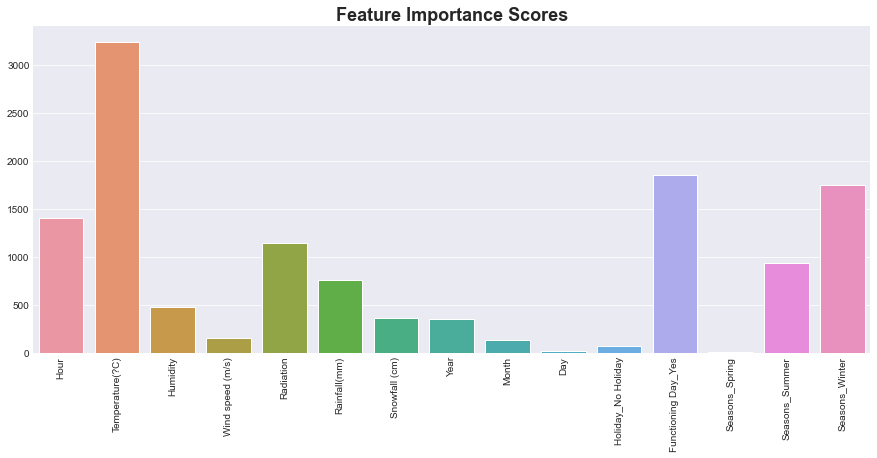

In [19]:
sns.set_style("darkgrid")
for i, j in enumerate(X.columns):
    print(f'{j}: {feature_contribution[i]:.2f}%')
plt.figure(figsize=(15, 6))
sns.barplot(x=X.columns, y=fs.scores_)
plt.title('Feature Importance Scores', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.show()


# Splitting our dataset into train and test set ¶


In [20]:
from sklearn.model_selection import train_test_split
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


# Feature Scaling 


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Modeling 


In [22]:
#importing different Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# XGBRegressor

In [30]:
from xgboost import XGBRegressor

#
model = XGBRegressor(n_estimators=300, learning_rate=0.1253, max_depth=9 , reg_alpha=0.81 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model R-Square: {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)*100:.2f}%")

accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.max()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Model R-Square: 93.00%
Model MSE: 7.21%
Cross Val Accuracy: 93.49 %
Cross Val Standard Deviation: 1.01 %


# Show  learning_curve for XGBRegressor

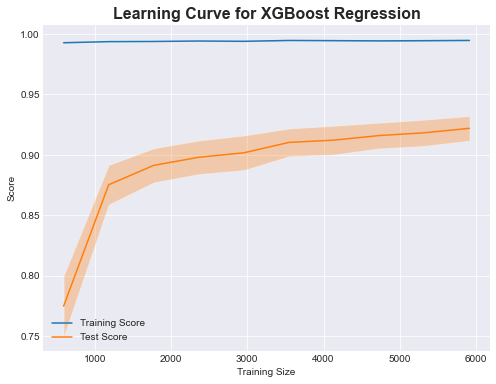

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)

plt.plot(train_sizes, test_mean, label='Test Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve for XGBoost Regression', fontsize=16, fontweight='bold')
plt.legend(loc='best')
plt.show()


# kernel SVM

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = SVR(kernel = 'rbf' , C=15.0654)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model R-Square: {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)*100:.2f}%")

accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10 , n_jobs=-1)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.max()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Model R-Square: 88.08%
Model MSE: 12.27%
Cross Val Accuracy: 88.69 %
Cross Val Standard Deviation: 1.02 %


# Show  learning_curve for kernel SVM

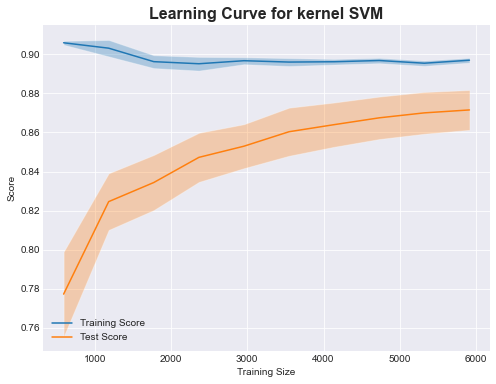

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)

plt.plot(train_sizes, test_mean, label='Test Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve for kernel SVM', fontsize=16, fontweight='bold')
plt.legend(loc='best')
plt.show()


# RandomForestRegressor

In [27]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Model R-Square : 91.29%
Model MSE : 8.97%
Cross Val Accuracy: 90.78 %
Cross Val Standard Deviation: 0.29 %


# GridSearchCV for RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 3, 7],
    
    'min_samples_leaf': [1, 2, 4]
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 300}
Best Score: 0.87


# Show  learning_curve for RandomForestRegressor

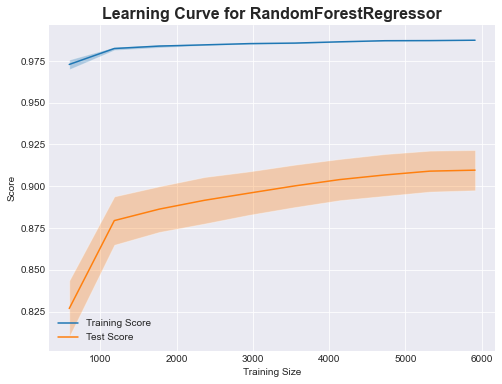

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)

plt.plot(train_sizes, test_mean, label='Test Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve for RandomForestRegressor', fontsize=16, fontweight='bold')
plt.legend(loc='best')
plt.show()


### Upcoming codes for EDA and Time series analysis for this Dataset